## Scraping the linkedIn web platform. Collecting informations about companies and job description.

In [69]:
import pandas as pd
from selenium import webdriver
from bs4 import BeautifulSoup as bs
import requests
import csv
import urllib.request
import time

In [70]:
## Creating a funtion that could manage different positions and areas
def get_url(position, area):
    templ = "https://www.indeed.co.uk/jobs?q={}&l={}"
    url = templ.format(position, area)
    return url    

In [71]:
## Here you can adapt the script for different search
url = get_url("domestic", "London")
url

'https://www.indeed.co.uk/jobs?q=domestic&l=London'

## Extract the html

In [72]:
## Let's also use Selenium to open a web browser which will be helpfull for parsing the esential information 
browser = webdriver.Chrome()

In [73]:
## Get the URL and give some sec to the browser to load the page
browser.get(url)
time.sleep(2)

In [74]:
## Firstly, working alongside with the webpage let's parse all the job cards of the page
soup = bs(browser.page_source, "html.parser")
cards = soup.find_all("div", "jobsearch-SerpJobCard")
len(cards)

15

In [75]:
def get_features(card):
    try:
        atag = card.h2.a
        job_title = atag.get("title")
    except:
        job_title = None
    try:
        job_url = "http://www.indeed.com" + atag.get("href")
    except:
        job_url = None
    try:
        company_name = card.find("span", "company").text.strip()
    except:
        company_name = None
    try:
        location = card.find("div", "recJobLoc").get("data-rc-loc")
    except:
        location = None
    try:
        summary = card.find("div", "summary").text.strip()
    except:
        summary = None
    try:
        post_date = card.find("span", "date").text
    except:
        post_date = None
   
    ## Opening a new page in order to scrape the full job description

    try:
        new_urls = [x.find('h2', attrs={'class': 'title'}).find('a', href=True)['href'] for x in cards]
        new_urls = "http://www.indeed.com" + atag.get("href")
        page = urllib.request.urlopen(new_urls)
        soup = bs(page.read(), "html.parser")
        job_body = soup.find('div', attrs={'id': "jobDescriptionText"}).text.replace("\n", "")
    except:
        job_body = None


    ## Saving the features to a list    
    
    feature = (job_title, job_url, company_name, location, summary, post_date, job_body)
    return feature 
    

## Getting results from all the pages



In [76]:
features = []
i = 0
while i<2:
    try:
        url = 'https://www.indeed.co.uk' + soup.find("a", {"aria-label": "Next"}).get("href")
    except AttributeError:
         break
            
    response = requests.get(url)
    soup = bs(response.text, "html.parser")
    cards = soup.find_all("div", "jobsearch-SerpJobCard")
    for card in cards:
            feature = get_features(card)
            time.sleep(1)
            features.append(feature)
    i += 1
          

In [77]:
print(len(features))

30


In [78]:
## Convert the list to csv file
with open('domestic_1.csv', 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Job Title','Job Url', 'Company', 'Location','Summary', 'Posting Date', "Desc"])
        writer.writerows(features)

In [79]:
df = pd.read_csv("domestic_1.csv")
df.head()

,Job Title,Job Url,Company,Location,Summary,Posting Date,Desc
0,Hospital Porter,http://www.indeed.com/company/Sharpsmart-Ltd/j...,Sharpsmart Ltd,London,Cleaning of large wheeled 770L domestic and re...,5 days ago,We have a vacancy for a Casual Hours Environme...
1,Family Support Worker,http://www.indeed.com/rc/clk?jk=f5dd51f488bb4c...,London Borough of Redbridge,Ilford,You will need to understand safeguarding and b...,3 days ago,Family Support WorkerPart-time 18 hoursRedbrid...
2,Policy Advisor - Regulatory Environment Team,http://www.indeed.com/rc/clk?jk=d48e5a684f33c7...,UK Government - Department for International T...,London,You will need strong interpersonal skills to s...,6 days ago,Work with colleagues across Government to anal...
3,"Researcher, Europe",http://www.indeed.com/rc/clk?jk=05fa6975782fd4...,Eurasia Group,London,The ideal candidate should have deep knowledge...,30+ days ago,Eurasia Group is seeking a creative and versat...
4,Health Care Assistant,http://www.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Lifted,North London,Flexible schedule - our unique technology allo...,5 days ago,"Camden Town, Swiss Cottage, Chalk Farm, Kentis..."


## Sort the table for inspecting how many open positiosn every company has. 

In [80]:
new_df = df.sort_values(by=['Company'])
new_df.head(50)

,Job Title,Job Url,Company,Location,Summary,Posting Date,Desc
23,Executive Assistant,http://www.indeed.com/rc/clk?jk=ab9ada4122711b...,Amazon Online UK Limited,London,Experience with domestic and/or international ...,30+ days ago,Experience with Microsoft Office ProductsExper...
6,Personal Assistant,http://www.indeed.com/rc/clk?jk=f666dbc0bdc96f...,Australasian Recruitment Company,London,Handling complex calendars including booking d...,4 days ago,THE ROLE:Are you a Personal Assistant with a p...
22,Commodity Analyst,http://www.indeed.com/rc/clk?jk=a16693db34b82d...,BNP Paribas,London,Actively seeks out and monitors critical indus...,7 days ago,Bank OverviewBNP Paribas is a leading bank in ...
17,Office Manager,http://www.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Capital Heat Ltd,London,Managing our booking system Commusoft and ensu...,8 days ago,Job OverviewCapital Heat Ltd are a Plumbing & ...
5,Office Manager,http://www.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Capital Heat Ltd,London,Managing our booking system Commusoft and ensu...,8 days ago,Job OverviewCapital Heat Ltd are a Plumbing & ...
3,"Researcher, Europe",http://www.indeed.com/rc/clk?jk=05fa6975782fd4...,Eurasia Group,London,The ideal candidate should have deep knowledge...,30+ days ago,Eurasia Group is seeking a creative and versat...
24,Wellbeing Lead,http://www.indeed.com/rc/clk?jk=b4e0e8a8782a41...,Fidelity International,London,"Provide subject matter expertise, advice and s...",5 days ago,About the opportunityDepartment DescriptionHum...
10,Wellbeing Lead,http://www.indeed.com/rc/clk?jk=b4e0e8a8782a41...,Fidelity International,London,"Provide subject matter expertise, advice and s...",5 days ago,About the opportunityDepartment DescriptionHum...
26,Personal Assistant to the CEO and SMT,http://www.indeed.com/rc/clk?jk=8304b30811f326...,ISUOG,London,You will also be responsible for the robust ma...,4 days ago,"You will provide comprehensive, confidential a..."
27,Administration,http://www.indeed.com/rc/clk?jk=f51e23089c8140...,KB Consultancy,London,Understanding of how the marketing extends bey...,30+ days ago,Location: Berkeley SQHours: Mon – Fri 9 to 5 (...


In [81]:
## Check the different locations
Locations = new_df["Location"].unique()
Locations

array(['London', 'North London', 'Ilford', 'Southwark', 'East London',
       'Hammersmith'], dtype=object)

In [82]:
## Inspecting the demand per area
demand_area = df.groupby("Location").count()
demand_area["Job Title"]

Location
East London      2
Hammersmith      1
Ilford           1
London          23
North London     2
Southwark        1
Name: Job Title, dtype: int64

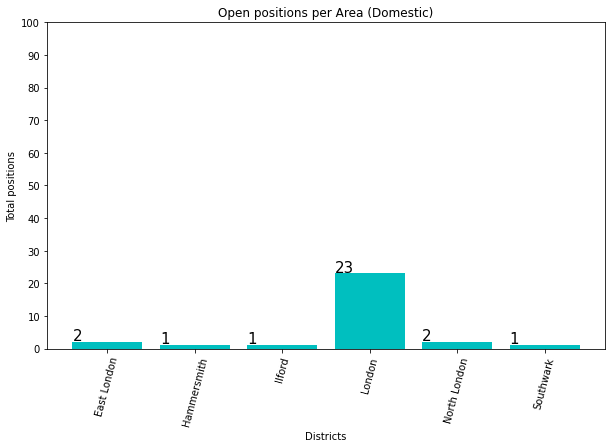

In [83]:
## Convert in to a bar chart
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))

x = [i for i, df in df.groupby("Location")]

plt.title("Open positions per Area (Domestic)")

bars = plt.bar(x, demand_area["Job Title"], color="c")

plt.xticks(rotation=75)
plt.yticks(np.arange(0,101,10))
plt.xlabel('Districts')
plt.ylabel('Total positions')

for bar in bars:
    xval = bar.get_width()
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .5, yval, fontsize=15)
    
plt.show()